<a href="https://colab.research.google.com/github/kunaldeep28/FOX-vs-RABBITS-vs-RACOONS/blob/master/fox_vs_racoons_vs_rabbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'rabbits'
file = 'rabbits.txt'

In [0]:
folder = 'racoons'
file = 'racoons.txt'

In [0]:
folder = 'fox'
file = 'fox.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
path.ls()

[PosixPath('data/bears/racoons'),
 PosixPath('data/bears/fox'),
 PosixPath('data/bears/rabbits'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/rabbits.txt'),
 PosixPath('data/bears/fox.txt'),
 PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/racoons.txt')]

In [14]:
download_images(path/file, dest, max_pics=200)

Error https://www.zooportraits.com/wp-content/uploads/2018/05/Red-Fox-Female-Vulpes-Vulpes.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


In [0]:
classes = ['rabbits', 'racoons', 'fox']

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

rabbits


cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000081.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000157.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000185.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/rabbits/00000186.jpg'>
racoons


cannot identify image file <_io.BufferedReader name='data/bears/racoons/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/racoons/00000034.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:938: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:938: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/racoons/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/racoons/00000049.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/bears/racoons/00000117.jpg'>
fox


cannot identify image file <_io.BufferedReader name='data/bears/fox/00000154.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000091.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000196.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/fox/00000001.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['fox', 'rabbits', 'racoons']

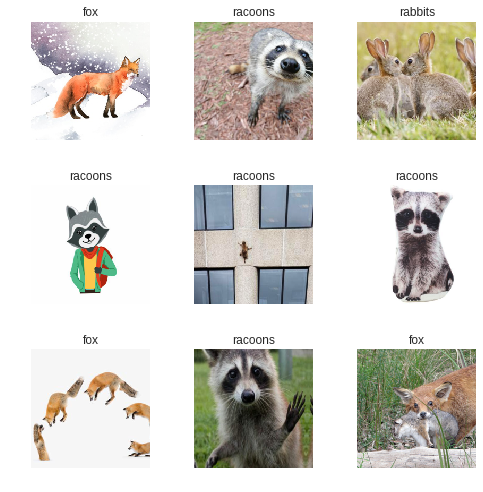

In [6]:
data.show_batch(rows=3, figsize=(7,7))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fox', 'rabbits', 'racoons'], 3, 457, 114)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.030587,0.199112,0.921053,00:12
1,0.582905,0.127519,0.938596,00:10
2,0.398550,0.127805,0.956140,00:10
3,0.311269,0.128669,0.947368,00:10


In [0]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (457 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
racoons,racoons,racoons,racoons,racoons
Path: data/bears;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rabbits,racoons,racoons,rabbits,rabbits
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [0]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


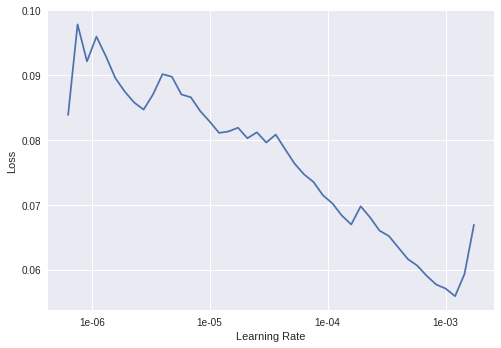

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr = slice(7e-6,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.072807,0.155756,0.947368,00:10
1,0.058317,0.133630,0.956140,00:11


In [0]:
learn.save('stage-2')

In [16]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (457 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
racoons,racoons,racoons,racoons,racoons
Path: data/bears;

Valid: LabelList (114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rabbits,racoons,racoons,rabbits,rabbits
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

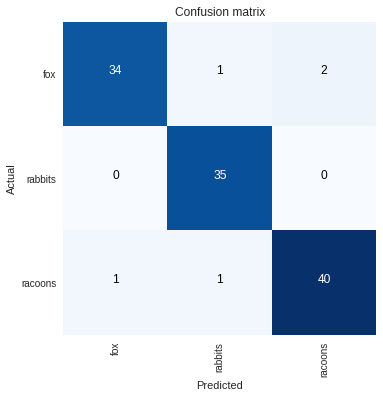

In [18]:
interp.plot_confusion_matrix()

In [19]:
interp.most_confused()

[('fox', 'racoons', 2),
 ('fox', 'rabbits', 1),
 ('racoons', 'fox', 1),
 ('racoons', 'rabbits', 1)]